# PROBLEM STATEMENT

Let's assume that you work as a consultant to a start-up company that was looking to develp a model to estimate the cost of good sold as they vary the production volume (number of units produced). The startup gathered data and has asked you to develop a model to predict its cost vs. number of units sold. You thought a polynomial regression model might be a good candidate.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# import Dataset

In [2]:
salary = pd.read_csv('Employee_Salary.csv')

In [3]:
salary.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [4]:
salary.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [6]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [7]:
X = salary[['Years of Experience']]
y = salary.Salary

In [8]:
X

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [9]:
y

0        40000.00000
1        65979.42119
2        67253.57549
3        67342.43510
4        70532.20448
            ...     
1995    421534.69100
1996    430478.02650
1997    438090.84540
1998    482242.16080
1999    500000.00000
Name: Salary, Length: 2000, dtype: float64

# Visualizing Data

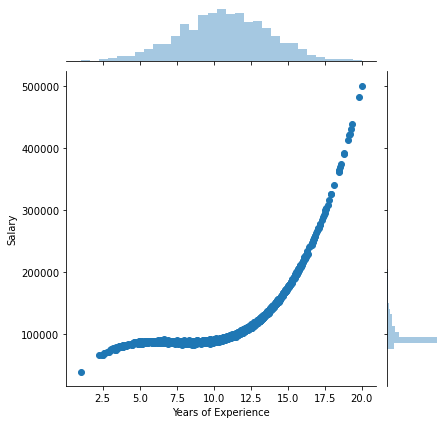

In [10]:
sns.jointplot(x='Years of Experience', y='Salary', data=salary)

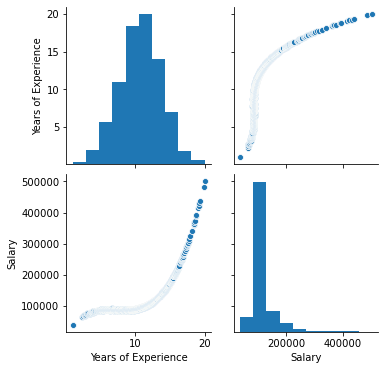

In [11]:
sns.pairplot(salary)

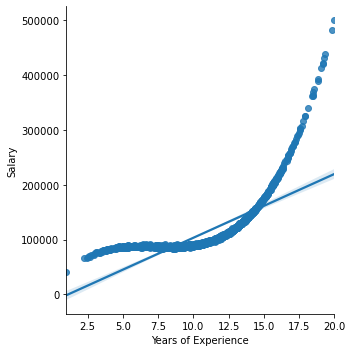

In [12]:
sns.lmplot(x='Years of Experience', y='Salary', data=salary)

# Training Data

In [13]:
X_train = X

In [14]:
y_train = y

In [15]:
X_train.shape

(2000, 1)

In [16]:
y_train.shape

(2000,)

# Model Training

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
print('Linear Coeeficient (m)', regressor.coef_)
print('Linear Intercept (b)', regressor.intercept_)

Linear Coeeficient (m) [11640.22916165]
Linear Intercept (b) -13063.099315186948


In [22]:
y_pred = regressor.predict(X_train)

Text(0, 0.5, 'Salary')

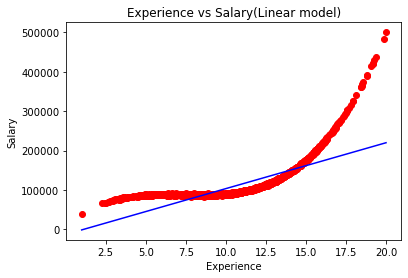

In [34]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, y_pred, color='blue')
plt.title('Experience vs Salary(Linear model)')
plt.xlabel('Experience')
plt.ylabel('Salary')

# Poly Model

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)
regressor2 = LinearRegression()
regressor2.fit(X_poly, y_train)

LinearRegression()

In [41]:
print('Linear Coeeficient (m)', regressor2.coef_)
print('Linear Intercept (b)', regressor2.intercept_)

Linear Coeeficient (m) [ 0.00000000e+00  3.18998938e+04 -4.44416359e+03  2.01309144e+02
  9.01918620e-02]
Linear Intercept (b) 12793.587378202152


In [42]:
y_pred2 = regressor2.predict(poly.fit_transform(X_train))

Text(0, 0.5, 'Salary')

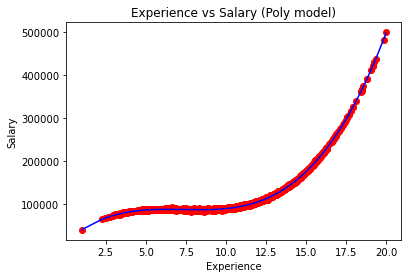

In [43]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, y_pred2, color='blue')
plt.title('Experience vs Salary (Poly model)')
plt.xlabel('Experience')
plt.ylabel('Salary')